ВАРИАНТ 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.integrate as integrate
import sympy

In [2]:
gamma = [0.9, 0.95, 0.98, 0.99]    
t = [1.729, 2.093, 2.539, 2.861]
hi = [27,2036, 30,1435, 32,8523, 36,1909]
hi2 = [11,6509, 10,1170, 8,9065, 7,6327]

def Fy(n):
    a, b, y0, X, Y = 1, 2, 3, [], []
    rv = sts.uniform() 
    xi = rv.rvs(size = n) 
    for i in range(n):
        x = xi[i] * (b - a) + a 
        X.append(x)
        y = np.exp(x) 
        Y.append(y)
    Y = sorted(Y) 
    return Y

def MO(n):
    fun = Fy(n)
    mx = sum(fun) / n 
    return mx

def DS(n, mx):
    fun = Fy(n)
    S0 = 0.
    for i in fun:
        S0 += (i - mx) ** 2
    S0 = S0 / (len(fun) - 1)
    return S0 

def student(n):
    mx = MO(n)
    S0 = DS(n, mx)
    span = []
    for i in t:
        a = mx - np.sqrt(S0) * i / np.sqrt(n - 1)
        b = mx + np.sqrt(S0) * i / np.sqrt(n - 1)
        span.append((a, b))
    return span 

def graf1(n, span):
    plt.plot(gamma, [i[1] - i[0] for i in span]) 
    
def Dfy():
    Mx = integrate.quad(lambda x: (x ** 2 / x), np.exp(1), np.exp(2))[0]
    mX = (integrate.quad(lambda x: (x / x), np.exp(1), np.exp(2)))[0] ** 2
    d = Mx - mX
    return d

def con_span(n):
    mx = MO(n)
    d = Dfy()
    span = []
    for i in t:
        a = mx - np.sqrt(d) * i / np.sqrt(n - 1)
        b = mx + np.sqrt(d) * i / np.sqrt(n - 1)
        span.append((a, b))
    return span

def graf2(n, span):
    plt.plot(gamma, [i[1] - i[0] for i in span])
    
def graf3_1(n):
    span1 = student(n)
    span2 = con_span(n)
    plt.plot(gamma, [i[1] - i[0] for i in span1])
    plt.plot(gamma, [i[1] - i[0] for i in span2])
    
def graf4():
    num = [30, 50, 70, 100, 150]
    arr1 = []
    for i in num:
        gr = con_span(i)
        arr1.append(gr)
    arr2 = []
    for i in arr1:
        gr = i[-1][0] - i[-1][1]
        arr2.append(gr)
    plt.plot(num, arr2)
    
def hi_2(n):
    mx = MO(n)
    S0 = DS(n, mx)
    span = []
    for i in range (0, len(hi), 2):
        a = (n - 1) * S0 / hi[i]
        b = (n - 1) * S0 / hi2[i]
        span.append((a, b))
    return span
    
def Mfy():
    m = integrate.quad(lambda x: (x / x), np.exp(1), np.exp(2))[0]
    return m

def con_hi_2(n):
    span = []
    m = Mfy()
    S0 = DS(n, m)
    for i in range(0, len(hi), 2):
        span.append((n * S0 / hi[i], n * S0 / hi2[i]))
    return span

def graf3_2(n):
    span1 = hi_2(n)
    span2 = con_hi_2(n)
    plt.plot(gamma, [i[1] - i[0] for i in span1])
    plt.plot(gamma, [i[1] - i[0] for i in span2])

def graf5():
    num = [30, 50, 70, 100, 150]
    arr1 = []
    for i in num:
        gr = con_hi_2(i)
        arr1.append(gr)
    arr2 = []
    for i in arr1:
        gr = i[-1][0] - i[-1][1]
        arr2.append(gr)
    plt.plot(num, arr2)

def task1_1():
    mx = MO(20)
    S0 = DS(20, mx)
    span1 = student(20)
    d = Dfy()
    span2 = con_span(20)
    print('1) Точечная оценка математического ожидания:', mx)
    print('\n2) Точечная оценка дисперсии:', S0)
    print('\n3) Доверительный интервал для оценки математического ожидания 1:\n', span1, '\n')
    print('4) График зависимости величины доверительного интервала от уровня значимости')
    graf1(20, span1)
    plt.show()
    print('\n5) Tеоретическое значение дисперсии:', d)
    print('\n6) Доверительный интервал для оценки математического ожидания 2:\n', span2, '\n')
    print('7) График зависимости величины доверительного интервала от уровня значимости')
    graf2(20, span2)
    plt.show()
    print('\n8) Сравнение результатов из пунктов 4 и 7')
    graf3_1(20)
    plt.show()
    
def task1_2():
    mx = MO(20)
    S0 = DS(20, mx)
    span1 = student(20)
    d = Dfy()
    span2 = con_span(20)
    print('\n9) Повтор для n = 30, 50, 70, 100, 150')
    print('\n   9.1) n = 30')
    graf3_1(30)
    plt.show()
    print('\n   9.2) n = 50')
    graf3_1(50)
    plt.show()
    print('\n   9.3) n = 70')
    graf3_1(70)
    plt.show()
    print('\n   9.4) n = 100')
    graf3_1(100)
    plt.show()
    print('\n   9.5) n = 150')
    graf3_1(150)
    plt.show()
    
def task1_3():
    print('\n10) График зависимости величины доверительного интервала от объема выборки')
    graf4()
    plt.show()
    
def task2_1():
    mx = MO(20)
    S0 = DS(20, mx)
    span1 = hi_2(20)
    m = Mfy()
    span2 = con_hi_2(20)
    print('1) Точечная оценка дисперсии:', S0)
    print('\n2) Точечная оценка математического ожидания:', mx)
    print('\n3) Доверительный интервал для оценки дисперсии 1:\n', span1, '\n')
    print('4) График зависимости величины доверительного интервала от уровня значимости')
    graf1(20, span1)
    plt.show()
    print('\n5) Tеоретическое значение математического ожидания:', m)
    print('\n6) Доверительный интервал для оценки дисперсии 2:\n', span2, '\n')
    print('7) График зависимости величины доверительного интервала от уровня значимости')
    graf2(20, span2)
    plt.show()
    print('\n8) Сравнение результатов из пунктов 4 и 7')
    graf3_2(20)
    plt.show()
    
def task2_2():
    mx = MO(20)
    S0 = DS(20, mx)
    span1 = hi_2(20)
    m = Mfy()
    span2 = con_hi_2(20)
    print('\n9) Повтор для n = 30, 50, 70, 100, 150')
    print('\n   9.1) n = 30')
    graf3_2(30)
    plt.show()
    print('\n   9.2) n = 50')
    graf3_2(50)
    plt.show()
    print('\n   9.3) n = 70')
    graf3_2(70)
    plt.show()
    print('\n   9.4) n = 100')
    graf3_2(100)
    plt.show()
    print('\n   9.5) n = 150')
    graf3_2(150)
    plt.show()
    
def task2_3():
    print('\n10) График зависимости величины доверительного интервала от объема выборки')
    graf5()
    plt.show()

1) Точечная оценка математического ожидания: 4.574920322221142

2) Точечная оценка дисперсии: 2.03845687217656

3) Доверительный интервал для оценки математического ожидания 1:
 [(4.1072556913687714, 5.02499476529334), (4.01065157832408, 5.121598878338031), (3.8922850002528375, 5.239965456409275), (3.8068275156363796, 5.325422941025732)] 

4) График зависимости величины доверительного интервала от уровня значимости


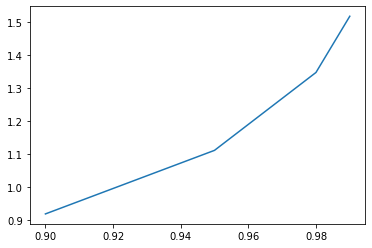


5) Tеоретическое значение дисперсии: 1.7884146814072395

6) Доверительный интервал для оценки математического ожидания 2:
 [(3.6320827495765666, 4.693001931339124), (3.5204070462331396, 4.804677634682551), (3.38357362949916, 4.941511051416531), (3.2847835842338204, 5.04030109668187)] 

7) График зависимости величины доверительного интервала от уровня значимости


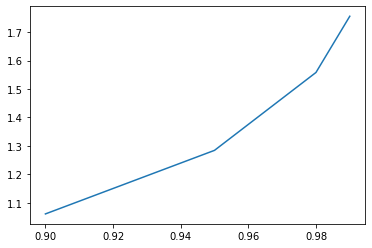


8) Сравнение результатов из пунктов 4 и 7


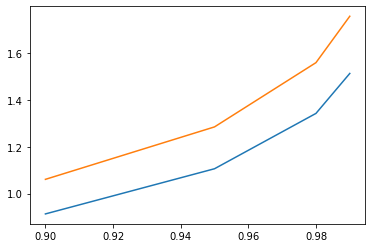

In [3]:
task1_1()


9) Повтор для n = 30, 50, 70, 100, 150

   9.1) n = 30


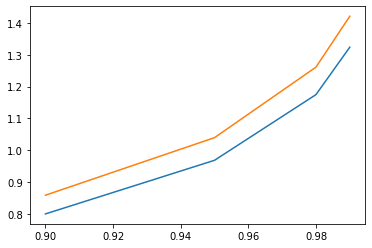


   9.2) n = 50


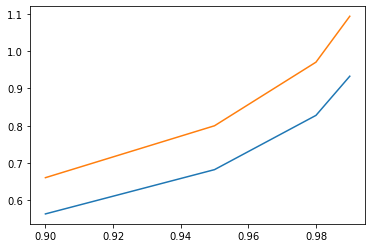


   9.3) n = 70


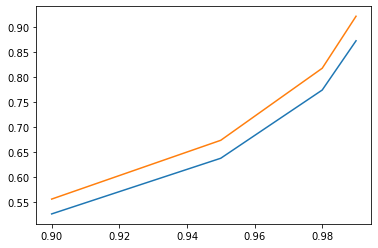


   9.4) n = 100


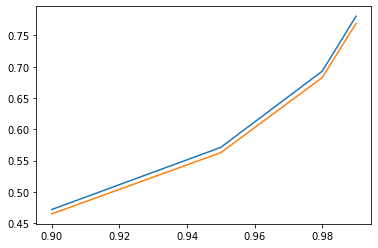


   9.5) n = 150


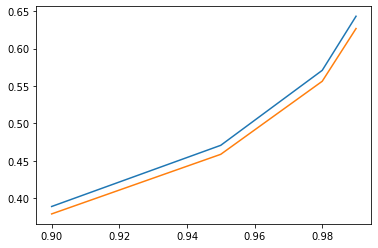

In [4]:
task1_2()


10) График зависимости величины доверительного интервала от объема выборки


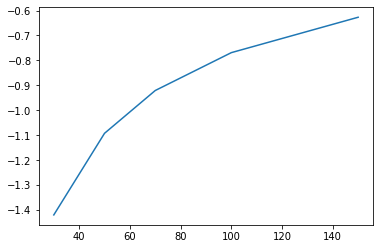

In [5]:
task1_3()

1) Точечная оценка дисперсии: 1.6057190977244875

2) Точечная оценка математического ожидания: 4.588404740997662

3) Доверительный интервал для оценки дисперсии 1:
 [(1.230488500231013, 3.020289955112487), (1.1074396502079118, 3.3223189506237354), (1.0382246720699173, 4.152898688279669), (0.9228663751732599, 4.7461699294624795)] 

4) График зависимости величины доверительного интервала от уровня значимости


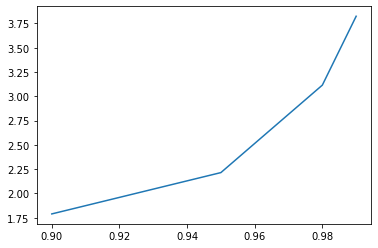


5) Tеоретическое значение математического ожидания: 4.670774270471606

6) Доверительный интервал для оценки дисперсии 2:
 [(1.3656578577482623, 3.35206928720028), (1.2290920719734362, 3.6872762159203085), (1.1522738174750964, 4.6090952699003855), (1.0242433933111967, 5.267537451314726)] 

7) График зависимости величины доверительного интервала от уровня значимости


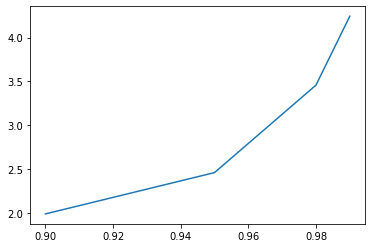


8) Сравнение результатов из пунктов 4 и 7


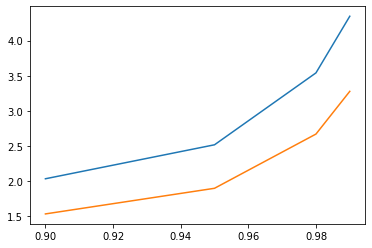

In [6]:
task2_1()


9) Повтор для n = 30, 50, 70, 100, 150

   9.1) n = 30


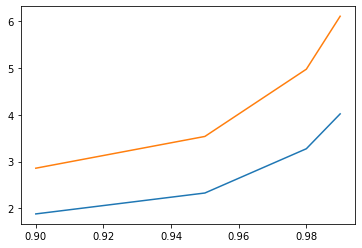


   9.2) n = 50


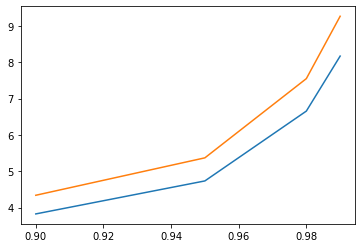


   9.3) n = 70


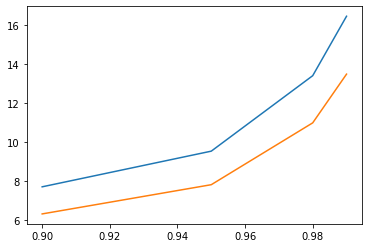


   9.4) n = 100


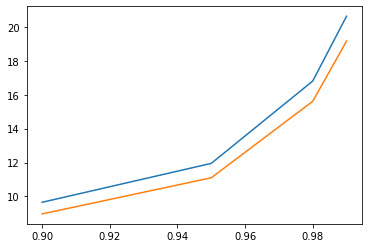


   9.5) n = 150


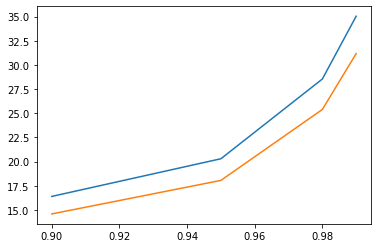

In [7]:
task2_2()


10) График зависимости величины доверительного интервала от объема выборки


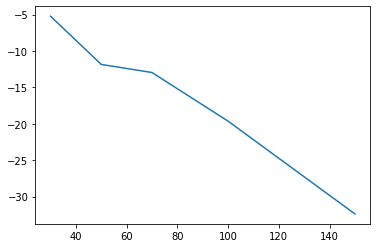

In [8]:
task2_3()